# Fourier denoising


## Example:

(a) Generate 3 sine waves with frequencies $1\rm Hz$, $5 Hz$, and $8 Hz$, amplitudes $4$, $2$ and $0.25$, and phase all zeros, adding Gaussian noise to them.

(b) Plot this $3$ sine waves together with a sampling rate $100 Hz$.

(c) Calculate the FFT of the resulting signal.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sine_wave(amp, freq, t):
    # amp  = amplitude
    # freq = frequency
    # t    = time_axis
    
    return amp*np.sin(2*np.pi*freq*t)

In [13]:
# sampling rate
s_rate = 100 #Hz

# sampling interval, signal goes from 0 to 1
s_interval = 1.0/s_rate

# t_axis
t = np.arange(0,1, s_interval)

# signal amplitudes
amp_1 = 4
amp_2 = 2
amp_3 = 0.25

# signal frequencies
freq_1 = 1
freq_2 = 5
freq_3 = 8

# signal
signal = sine_wave(amp_1, freq_1, t) +\
sine_wave(amp_2, freq_2, t) + sine_wave(amp_3, freq_3, t)

# create copy of the signal
signal_clean = signal

# add noise to the signal
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

signal = signal + 0.5*np.random.randn(len(t))

print(t.size, signal.size)

100 100


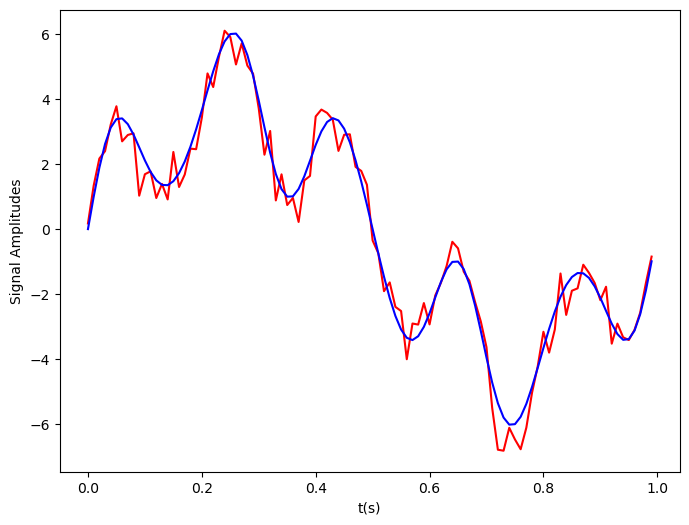

In [15]:
plt.figure(figsize= (8,6))

plt.plot(t, signal, "red")
plt.plot(t, signal_clean, "blue")

plt.xlabel("t(s)")
plt.ylabel("Signal Amplitudes")
plt.show()

## Fourier space:

In [24]:
fourier_signal = np.fft.fft(signal)

# calculate the frequency
N = len(fourier_signal)
n = np.arange(N)
T = N/s_rate
freqs = n/T

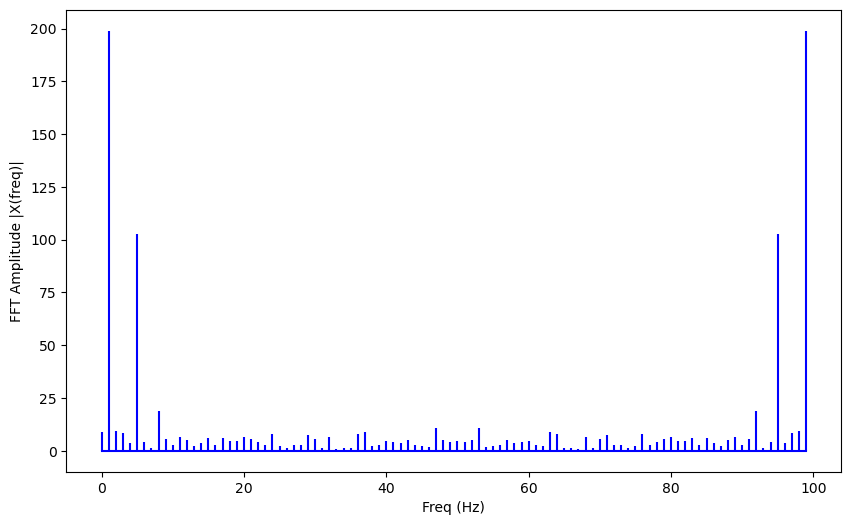

In [25]:
plt.figure(figsize = (10, 6))
plt.stem(freqs, np.abs(fourier_signal), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

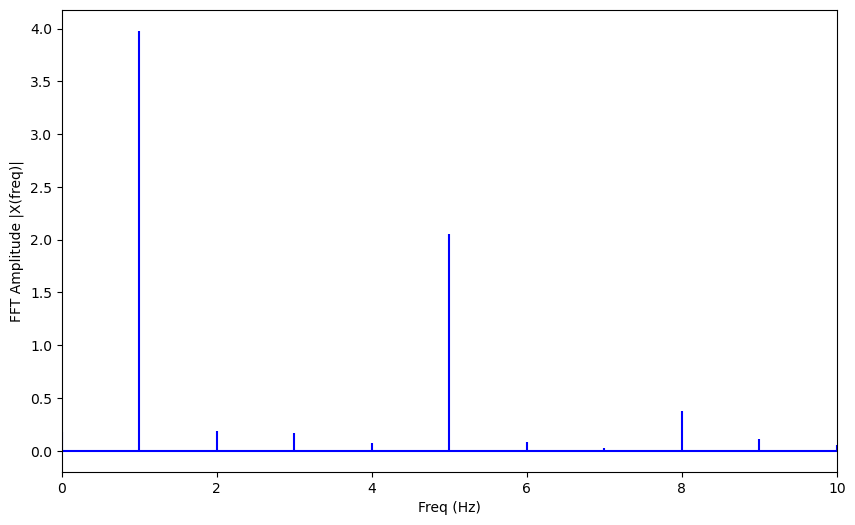

In [27]:
plt.figure(figsize = (10, 6))
plt.stem(freqs[:N//2], abs(fourier_signal)[:N//2]/(N//2), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.xlim(0,10)
plt.show()

## Remove noise based on a amplitude threshold

In [28]:
# Amplitude threshld

amp_threshold = 15

indices = np.abs(fourier_signal) > amp_threshold

print(indices)

[False  True False False False  True False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False False  True]


In [29]:
fourier_signal_2 = indices* fourier_signal

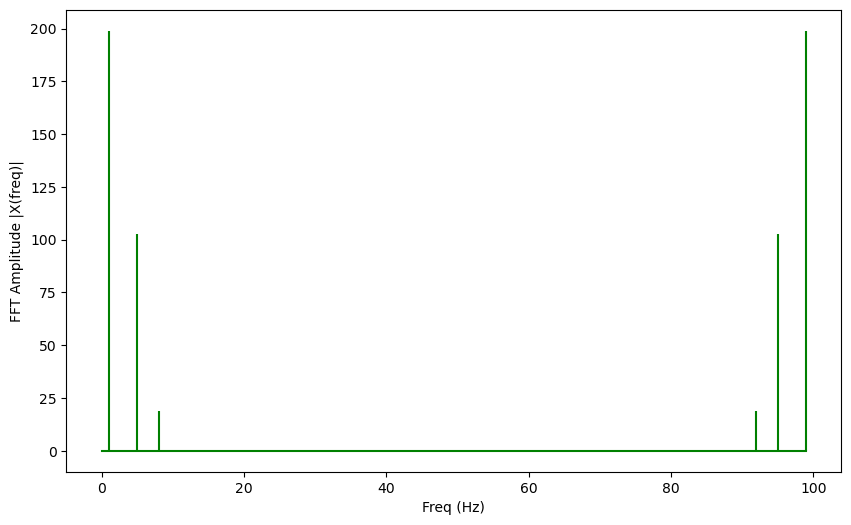

In [34]:
plt.figure(figsize = (10, 6))
#plt.stem(freqs, np.abs(fourier_signal), 'b', markerfmt=" ", basefmt="-b")
plt.stem(freqs, np.abs(fourier_signal_2), 'g', markerfmt=" ", basefmt="-g")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

## Inverse Fourier Transform of the filtered Fourier signal

In [36]:
signal_filtered = np.fft.ifft(fourier_signal_2)

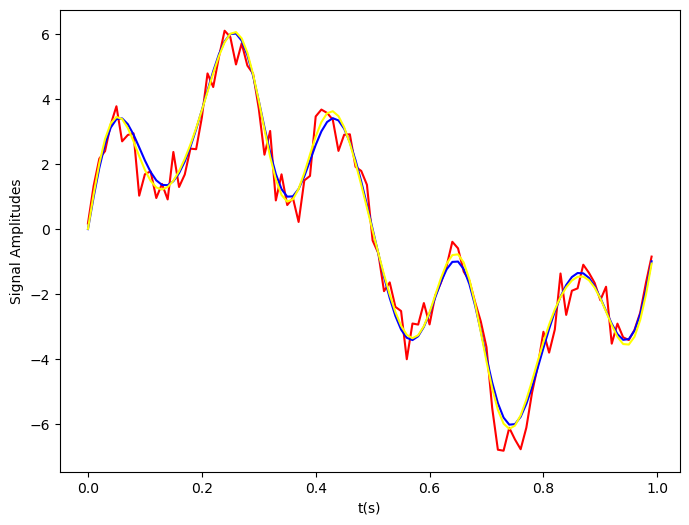

In [39]:
plt.figure(figsize= (8,6))

plt.plot(t, signal, "red")
plt.plot(t, signal_clean, "blue")
plt.plot(t, signal_filtered.real, "yellow")

plt.xlabel("t(s)")
plt.ylabel("Signal Amplitudes")
plt.show()